In [8]:
import rasterio
import numpy as np
import matplotlib.pylab as plt

In [23]:
with rasterio.open('landsat2014_B5.TIF') as src:
    nir2014 = src.read()
    profile = src.profile 
    transform = src.transform
    crs = src.crs
    crs2014 = src.crs
with rasterio.open('landsat2014_B4.TIF') as src:
    red2014 = src.read()
with rasterio.open('landsat2024_B5.TIF') as src:
    nir2024 = src.read()
    crs2024 = src.crs
with rasterio.open('landsat2024_B4.TIF') as src:
    red2024 = src.read()

In [ ]:
with rasterio.open('landsat2014_B5.TIF') as src:
    nir2014 = src.read()
    profile = src.profile

In [3]:
def calculate_ndvi(nir, red):
    ndvi = (nir - red) / (nir + red)
    return ndvi

In [4]:
ndvi2014 = calculate_ndvi(nir2014, red2014)
ndvi2024 = calculate_ndvi(nir2024, red2024)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17888\3715128374.py:2: RuntimeWarning: divide by zero encountered in divide
  ndvi = (nir - red) / (nir + red)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17888\3715128374.py:2: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


In [7]:
nvdi_change = ndvi2024 - ndvi2014
classified_nvdi_change = np.where(nvdi_change>0.1,1,np.where(nvdi_change <-0.1,-1, 0))

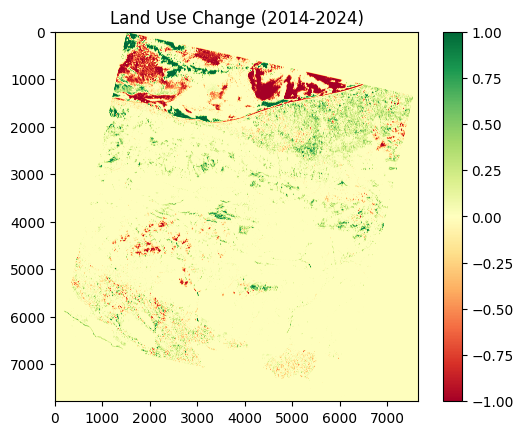

In [10]:
classified_nvdi_change = classified_nvdi_change.squeeze()
plt.imshow(classified_nvdi_change, cmap='RdYlGn')
plt.colorbar()
plt.title('Land Use Change (2014-2024)')
plt.show()

In [13]:
with rasterio.open('nvdi_change.tif', 'w', **profile) as dst:
    dst.write(classified_nvdi_change.astype(rasterio.int32), 1)

In [20]:
def getRasterValue(xy, raster, transform):
    xy = list(xy)
    row, col = ~transform * (xy[1], xy[0])
    row, col = int(row), int(col)
    value = raster[row,col]
    return value

In [21]:
cords = 35.70690384860917, 51.02285655903448
getRasterValue( cords, classified_nvdi_change, transform)

IndexError: index -16037 is out of bounds for axis 0 with size 7781

In [24]:
crs

CRS.from_epsg(32639)

In [1]:
import rsgislib


ModuleNotFoundError: No module named 'rsgislib'

In [1]:
import rsgislib
